In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Задание:

Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно.

Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.

Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически (один вопрос/гипотеза — один график).

Желательно, но не обязательно:*

Если данные содержат пропуски, заполните их и обоснуйте своё решение. Проверьте, как изменились базовые статистики до и после замены.

Требования по оформлению графиков: У графиков должен быть заголовок, подписи осей, легенда (опционально). Каждая визуализация должным образом оформлена и может быть интерпретирована даже в отрыве от контекста.

Важно! Оставляйте свои комментарии к графикам: отвечает ли визуализация на поставленный вопрос, что вы наблюдаете в данных, какие выводы можно сделать и т.д. Ход ваших мыслей так же важен, как и написанный вами код.

Age: The age of the individuals in the dataset, representing their chronological age in years.
Gender: The gender identification of the individuals, indicating their gender or gender identity.
Education Level: The highest level of education attained by the individuals, indicating their educational qualifications or degree.
Job Title: The occupation or job title of the individuals, specifying their professional role or position.
Years of Experience: The number of years of professional experience accumulated by the individuals in their respective fields.
Salary: The income level or salary earned by the individuals, denoting their monetary compensation.
Country: The country of residence or origin of the individuals, providing geographical information.
Race: The racial background or ethnicity of the individuals, reflecting their specific racial or ethnic group.

In [ ]:
df = pd.read_csv('salary_dataset.csv', index_col = [0])

In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 471.4+ KB


In [ ]:
df[df.duplicated()]
#оставляем, вполне может быть, что это разные люди

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0,USA,Asian
310,29.0,Female,Bachelor's,Junior Business Development Associate,1.5,35000.0,Australia,White
345,33.0,Male,Bachelor's,Junior Business Analyst,4.0,60000.0,Canada,Black
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0,UK,White
392,31.0,Female,Bachelor's,Software Engineer,6.0,155000.0,UK,Welsh
...,...,...,...,...,...,...,...,...
6683,51.0,Female,Master's Degree,Content Marketing Manager,19.0,190000.0,UK,White
6684,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0,China,Chinese
6692,24.0,Male,Bachelor's Degree,Sales Executive,1.0,35000.0,Canada,Asian
6697,51.0,Female,Master's Degree,Senior Product Marketing Manager,19.0,190000.0,UK,White


In [ ]:
#процент пустых значений по каждой колонке
df.isna().mean()*100

Age                    0.029833
Gender                 0.029833
Education Level        0.044749
Job Title              0.029833
Years of Experience    0.044749
Salary                 0.074582
Country                0.000000
Race                   0.000000
dtype: float64

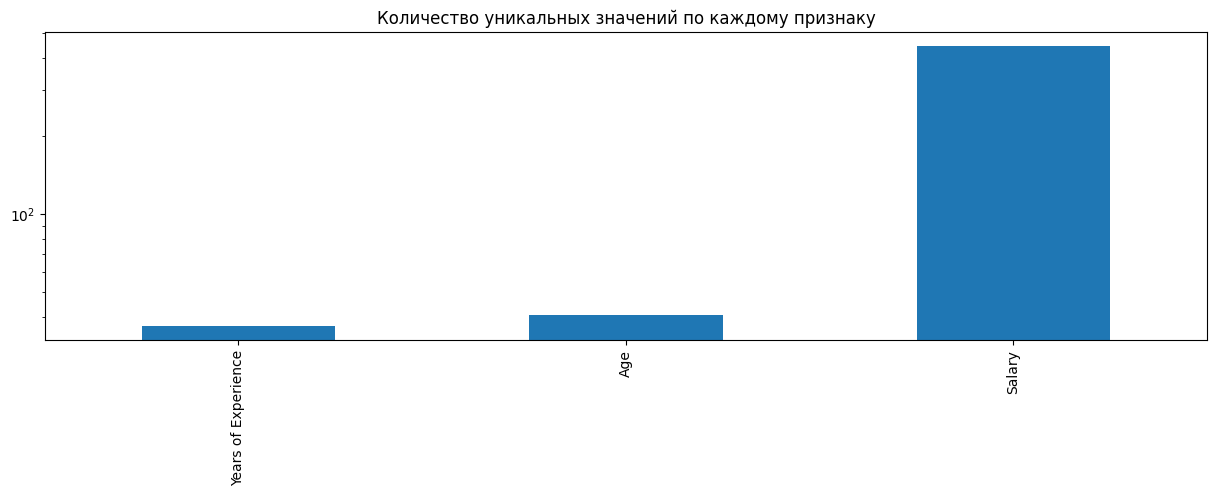

In [ ]:
#Какое количество уникальных значений по каждому признаку?
unique_values = df.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 4), title="Количество уникальных значений по каждому признаку");

In [ ]:
 # функция для числовой переменной
def linear_var(variable):
    #variable = variable.astype(float)
    print( "Кол-во пустых - " + str( variable.isna().sum() ) )
    print( "Кол-во непустых - " + str( variable.count() ) )
    print( "Мода - " + str( (variable.mode()[0])) + "\n")
    print( str( (variable.describe())))

    variable.value_counts().sort_index().plot(kind='bar')
    plt.show()

    # поиск выбросов
    plt.boxplot(variable.dropna().astype(float))
    plt.show()

 # функция для категориальной переменной
def categorial_var(variable):
    print( "Кол-во пустых - " + str( variable.isna().sum() ) )
    print( "Кол-во непустых - " + str( variable.count() ) )
    print( "Уникальные значения - " +  str( variable.dropna().unique() ) + "\n")
    print( "Распределение значений \n" +  str( variable.value_counts() ) + "\n")
    print( "Распределение значений в % \n" + str( variable.value_counts(normalize=True) * 100 ) + "\n")

    print('Гистограмма распределения')
    variable.value_counts().plot(kind='bar')
    plt.show()

Кол-во пустых - 2
Кол-во непустых - 6702
Уникальные значения - ['Male' 'Female' 'Other']

Распределение значений 
Male      3674
Female    3014
Other       14
Name: Gender, dtype: int64

Распределение значений в % 
Male      54.819457
Female    44.971650
Other      0.208893
Name: Gender, dtype: float64

Гистограмма распределения


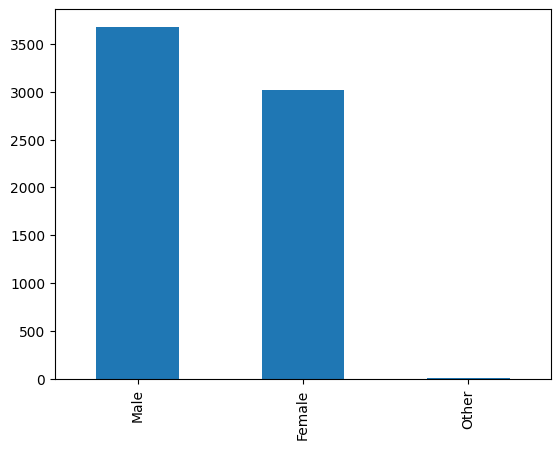

In [ ]:
categorial_var(df['Gender'])

Кол-во пустых - 2
Кол-во непустых - 6688
Уникальные значения - ['Male' 'Female']

Распределение значений 
Male      3674
Female    3014
Name: Gender, dtype: int64

Распределение значений в % 
Male      54.934211
Female    45.065789
Name: Gender, dtype: float64

Гистограмма распределения


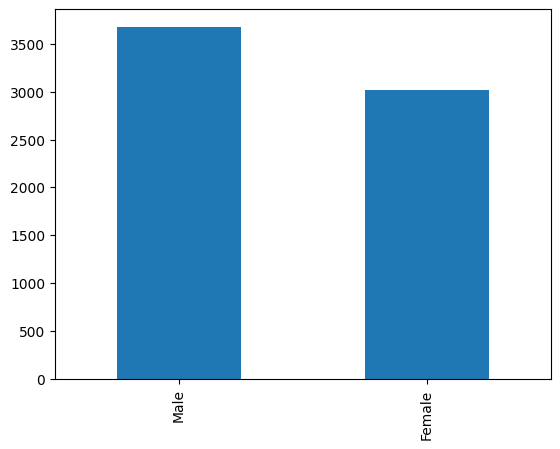

In [ ]:
#Уберем из анализа строки со значением Other
df = df[df.Gender != 'Other']
categorial_var(df['Gender'])

Кол-во пустых - 3
Кол-во непустых - 6687
Уникальные значения - ["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']

Распределение значений 
Bachelor's Degree    2267
Master's Degree      1571
PhD                  1368
Bachelor's            756
High School           436
Master's              288
phD                     1
Name: Education Level, dtype: int64

Распределение значений в % 
Bachelor's Degree    33.901600
Master's Degree      23.493345
PhD                  20.457604
Bachelor's           11.305518
High School           6.520114
Master's              4.306864
phD                   0.014954
Name: Education Level, dtype: float64

Гистограмма распределения


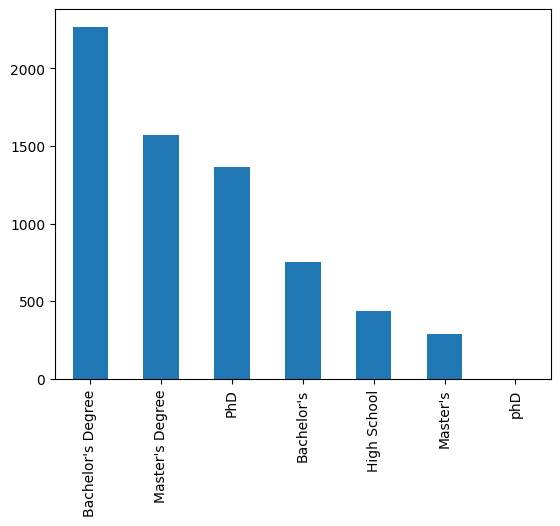

In [ ]:
categorial_var(df['Education Level'])

Кол-во пустых - 3
Кол-во непустых - 6687
Уникальные значения - ["Bachelor's" "Master's" 'PhD' 'High School']

Распределение значений 
Bachelor's     3023
Master's       1859
PhD            1369
High School     436
Name: Education Level, dtype: int64

Распределение значений в % 
Bachelor's     45.207118
Master's       27.800209
PhD            20.472559
High School     6.520114
Name: Education Level, dtype: float64

Гистограмма распределения


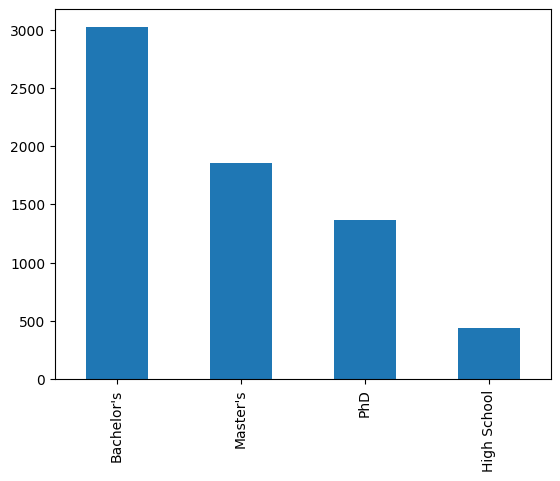

In [ ]:
#объединим однородные по сути значения:
df['Education Level'] = df['Education Level'].str.replace('phD','PhD')
df['Education Level'] = df['Education Level'].str.replace(' Degree','')
categorial_var(df['Education Level'])

Кол-во пустых - 2
Кол-во непустых - 6688
Уникальные значения - ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 'Busines

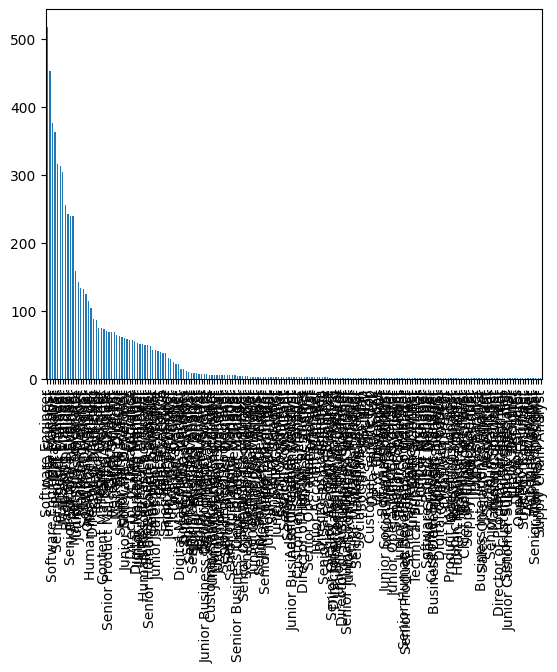

In [ ]:
categorial_var(df['Job Title'])

Кол-во пустых - 0
Кол-во непустых - 6704
Уникальные значения - ['UK' 'USA' 'Canada' 'China' 'Australia']

Распределение значений 
USA          1360
China        1343
UK           1337
Australia    1336
Canada       1328
Name: Country, dtype: int64

Распределение значений в % 
USA          20.286396
China        20.032816
UK           19.943317
Australia    19.928401
Canada       19.809069
Name: Country, dtype: float64

Гистограмма распределения


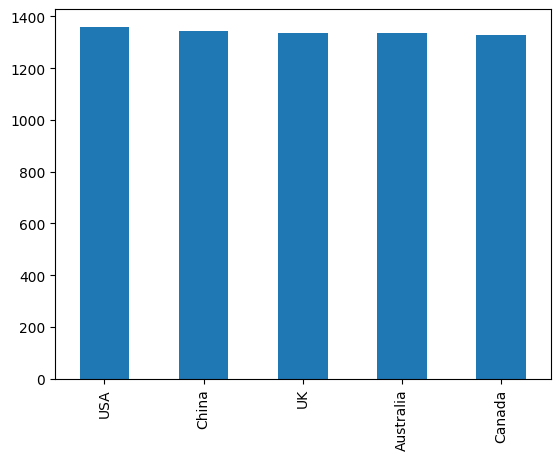

In [ ]:
categorial_var(df['Country'])

Кол-во пустых - 0
Кол-во непустых - 6690
Уникальные значения - ['White' 'Hispanic' 'Asian' 'Korean' 'Chinese' 'Australian' 'Welsh'
 'African American' 'Mixed' 'Black']

Распределение значений 
White               1963
Asian               1599
Korean               457
Australian           452
Chinese              443
Black                435
African American     352
Mixed                334
Welsh                333
Hispanic             322
Name: Race, dtype: int64

Распределение значений в % 
White               29.342302
Asian               23.901345
Korean               6.831091
Australian           6.756353
Chinese              6.621824
Black                6.502242
African American     5.261584
Mixed                4.992526
Welsh                4.977578
Hispanic             4.813154
Name: Race, dtype: float64

Гистограмма распределения


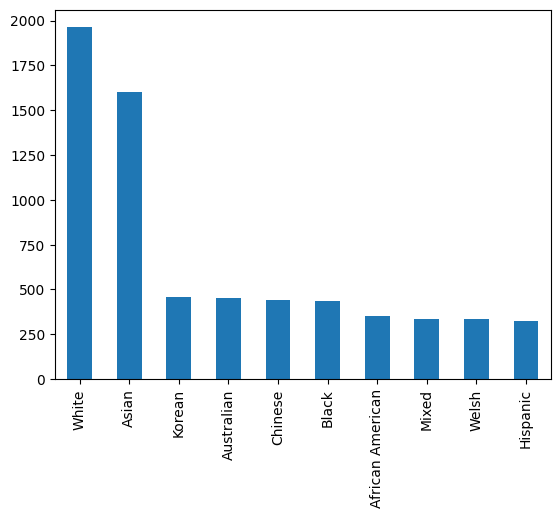

In [ ]:
categorial_var(df['Race'])

Кол-во пустых - 0
Кол-во непустых - 6690
Уникальные значения - ['White' 'Asian' 'Black' 'Mixed']

Распределение значений 
White    3070
Asian    2499
Black     787
Mixed     334
Name: Race, dtype: int64

Распределение значений в % 
White    45.889387
Asian    37.354260
Black    11.763827
Mixed     4.992526
Name: Race, dtype: float64

Гистограмма распределения


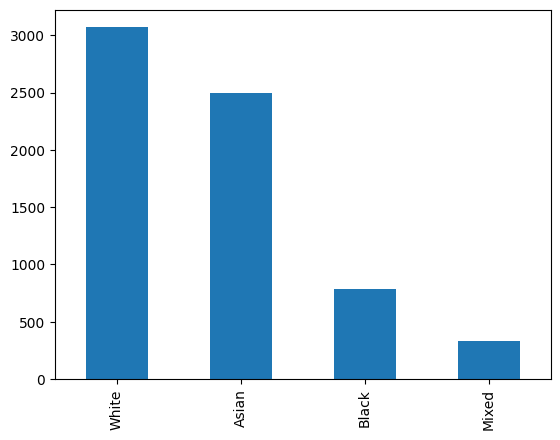

In [ ]:
#объединим однородные по сути значения:
df['Race'] = df['Race'].str.replace('Korean','Asian')
df['Race'] = df['Race'].str.replace('Chinese','Asian')
df['Race'] = df['Race'].str.replace('Welsh','White')
df['Race'] = df['Race'].str.replace('Australian','White')
df['Race'] = df['Race'].str.replace('Hispanic','White')
df['Race'] = df['Race'].str.replace('African American','Black')
categorial_var(df['Race'])

Кол-во пустых - 2
Кол-во непустых - 6688
Мода - 27.0

count    6688.000000
mean       33.608403
std         7.594846
min        21.000000
25%        28.000000
50%        32.000000
75%        38.000000
max        62.000000
Name: Age, dtype: float64


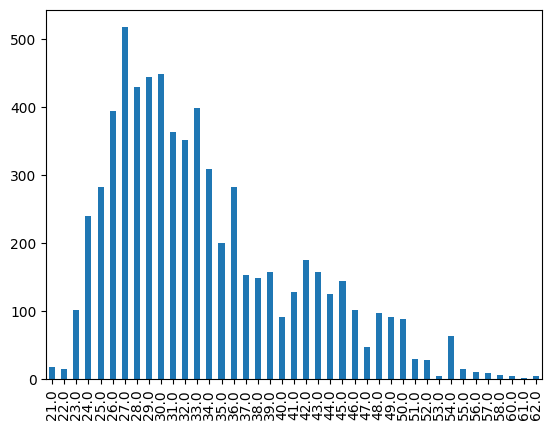

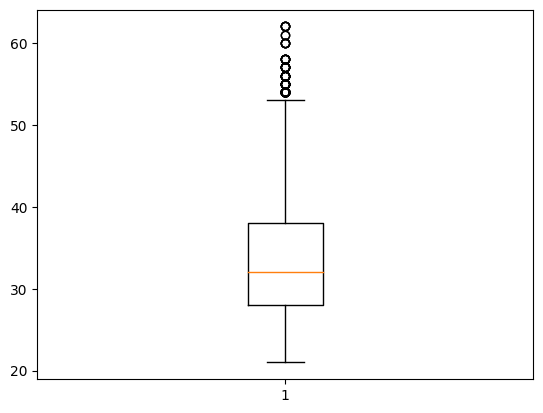

In [ ]:
linear_var(df['Age'])

Кол-во пустых - 3
Кол-во непустых - 6687
Мода - 2.0

count    6687.000000
mean        8.077239
std         6.028020
min         0.000000
25%         3.000000
50%         7.000000
75%        12.000000
max        34.000000
Name: Years of Experience, dtype: float64


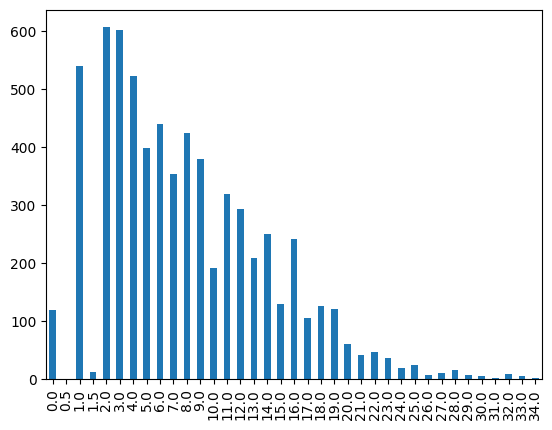

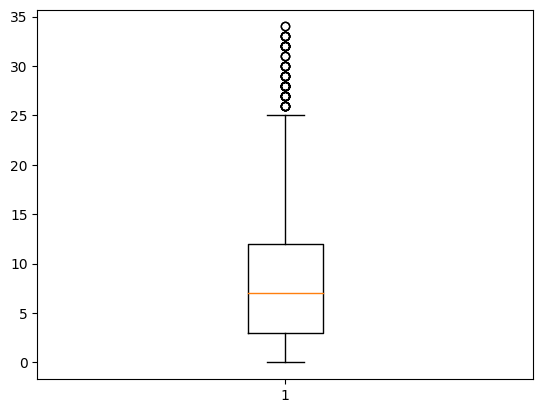

In [ ]:
linear_var(df['Years of Experience'])

Кол-во пустых - 5
Кол-во непустых - 6685
Мода - 140000.0

count      6685.000000
mean     115304.885415
std       52803.192388
min         350.000000
25%       70000.000000
50%      115000.000000
75%      160000.000000
max      250000.000000
Name: Salary, dtype: float64


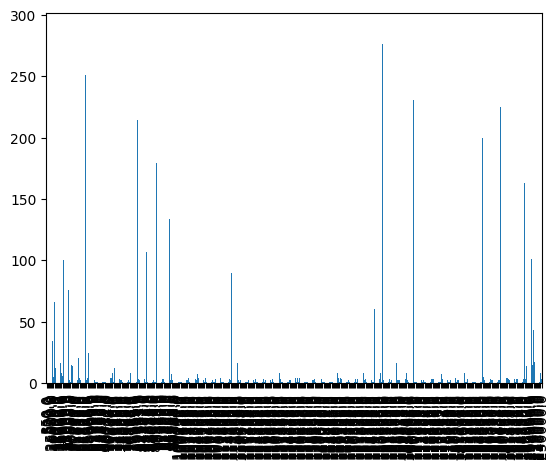

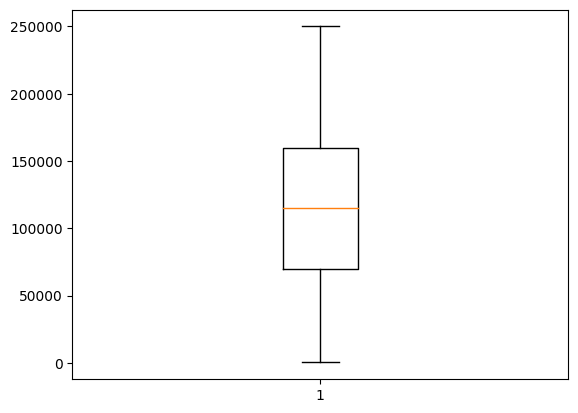

In [ ]:
linear_var(df['Salary'])

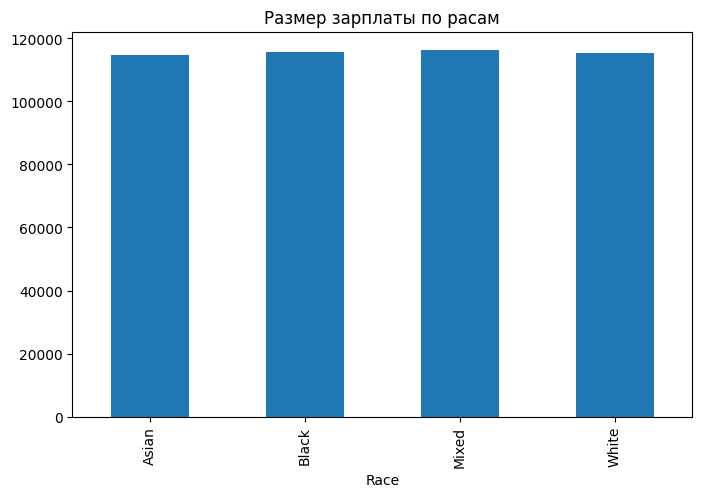

In [ ]:
plt.figure(figsize=[8,5])
df.groupby('Race')['Salary'].mean().plot(kind="bar")
plt.title("Размер зарплаты по расам")
plt.show()

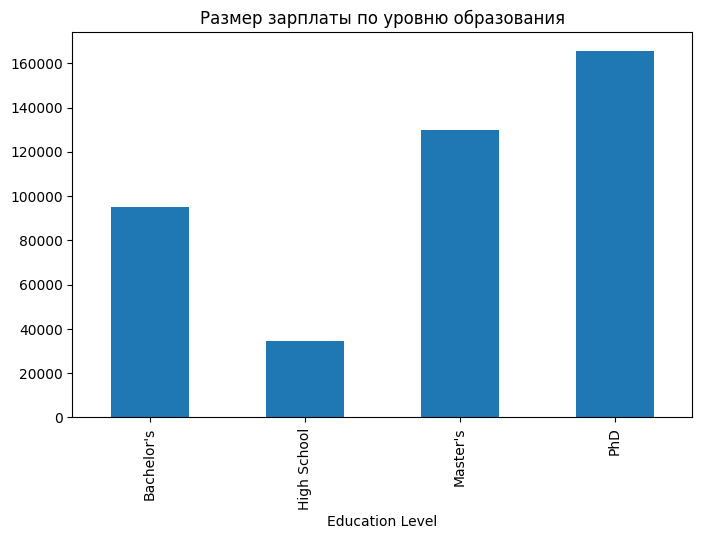

In [ ]:
plt.figure(figsize=[8,5])
df.groupby('Education Level')['Salary'].mean().plot(kind="bar")
plt.title("Размер зарплаты по уровню образования")
plt.show()

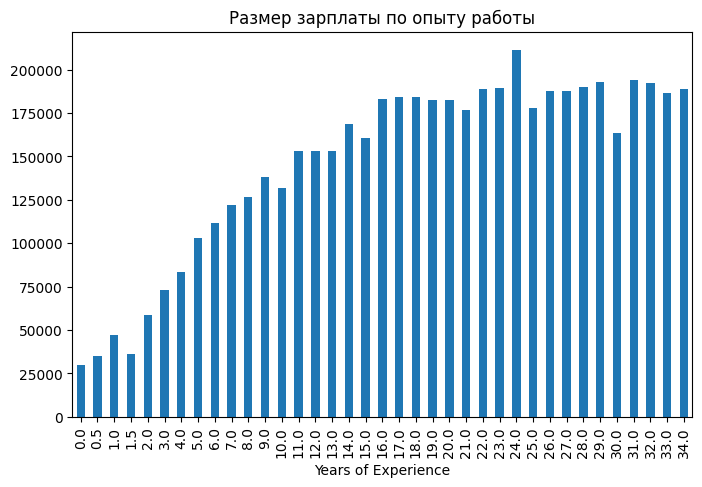

In [ ]:
plt.figure(figsize=[8,5])
df.groupby('Years of Experience')['Salary'].mean().plot(kind="bar")
plt.title("Размер зарплаты по опыту работы")
plt.show()

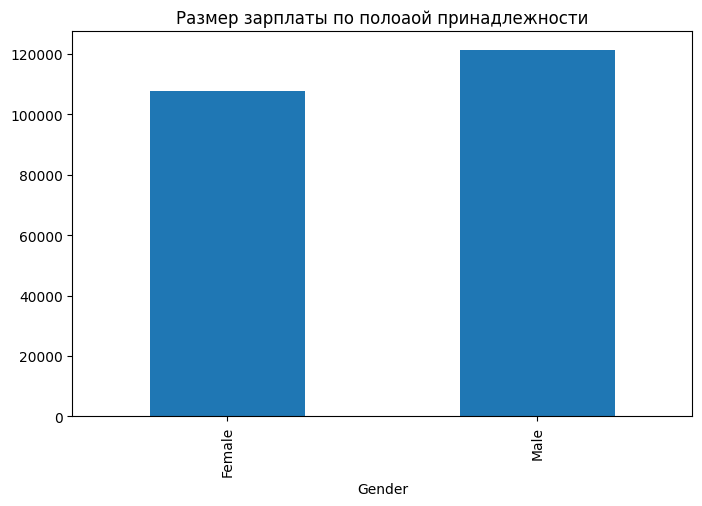

In [ ]:
plt.figure(figsize=[8,5])
df.groupby('Gender')['Salary'].mean().plot(kind="bar")
plt.title("Размер зарплаты по полоаой принадлежности")
plt.show()

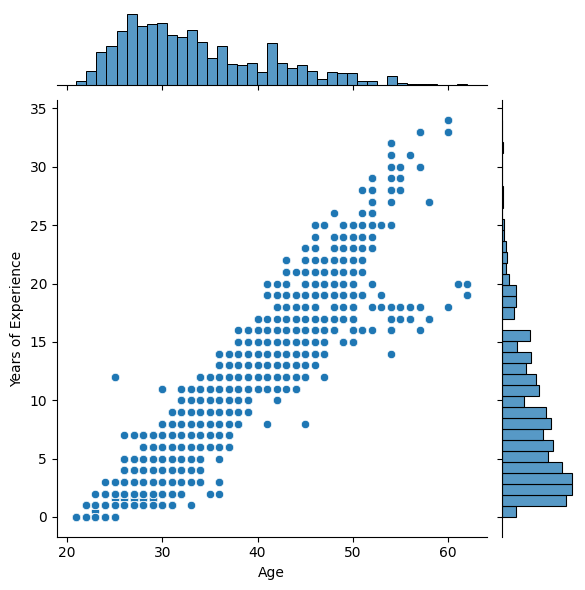

In [ ]:
#Зависит ли опыт работы от возраста?
sns.jointplot(x='Age', y ='Years of Experience', data=df)

да, зависит

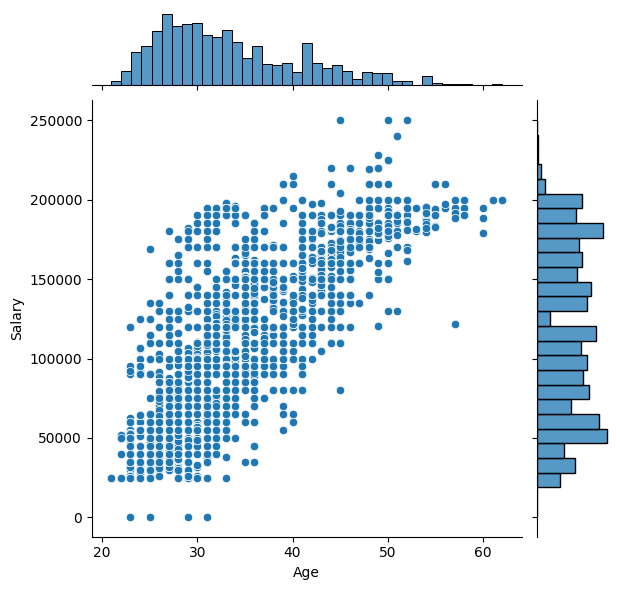

In [ ]:
#Зависит ли зарплата от возраста?
sns.jointplot(x='Age', y ='Salary', data=df)

да, зависит

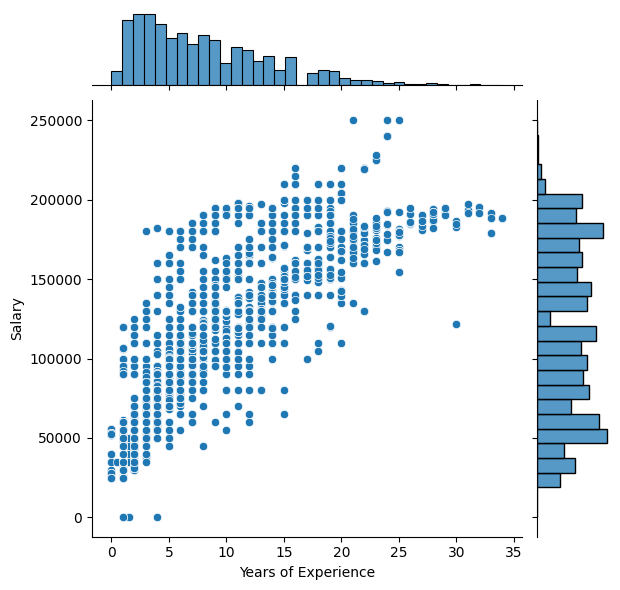

In [ ]:
#Зависит ли зарплата от опыта работы?
sns.jointplot(x='Years of Experience', y ='Salary', data=df)

да, зависит